<a href="https://colab.research.google.com/github/peculab/EduData/blob/main/Example1_DataLoading_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

金門縣政府提供教育相關數據

https://drive.google.com/drive/folders/1ZnEmLN_Gbx074-dv_8m3chn2vvhaeUSK?usp=sharing

金門縣myViewBoard_202406

https://docs.google.com/spreadsheets/d/1mOaEuhQMICf0GQ0rYi7alli72lpkueF4uETobvryguE/edit?usp=sharing

from google.colab import auth：

    這行程式從 Google Colab 模組中導入 auth 物件，用來進行用戶身份驗證。

auth.authenticate_user()：

    此行程式會彈出 Google 登錄對話框，要求用戶登錄他們的 Google 帳戶並授權此筆程式訪問 Google Drive API（包括 Google Sheets）。當用戶完成登錄後，會自動生成授權憑證，讓後續程式可以使用這些權限。

import gspread：

    gspread 是一個 Python 庫，用於通過 Google Sheets API 操作 Google Sheets，提供便捷的方式來讀取、寫入和操作表格數據。

from google.auth import default：

    這行導入了 default() 函數，這個函數會自動返回用戶的 Google API 認證憑證（Credentials）和專案資訊。通常在 Google Colab 環境中，它會自動找到當前使用者的默認憑證。

creds, _ = default()：

    此行程式調用 default() 函數，並將返回的憑證物件存入 creds 變數，這些憑證稍後將被用於進行 Google API 認證。

gc = gspread.authorize(creds)：

    這行將憑證 (creds) 授權給 gspread，這樣 gspread 就能夠通過已授權的 Google API 操作 Google Sheets。最終，gc 是一個 Google Sheets 客戶端物件，你可以用它來訪問並操作 Google Sheets 的內容。

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Pv28YBBn47SwBcioXyqaGOuYaPHRoH2wfmF5U_9KuVk/edit?usp=sharing')
gsheets6 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1mOaEuhQMICf0GQ0rYi7alli72lpkueF4uETobvryguE/edit?usp=sharing')

In [3]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets2 = gsheets2.worksheet('All-whiteboard-device').get_all_values()
sheets6 = gsheets6.worksheet('All-whiteboard-device').get_all_values()

# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df2 = pd.DataFrame(sheets2[1:], columns=sheets2[0])
df6 = pd.DataFrame(sheets6[1:], columns=sheets6[0])

In [4]:
df2['Windows Whiteboard'] = df2['Windows Whiteboard'].astype(int)
df2['Android Whiteboard'] = df2['Android Whiteboard'].astype(int)
df2['Mac & IPadOs Whiteboard'] = df2['Mac & IPadOs Whiteboard'].astype(int)

df6['Windows Whiteboard'] = df6['Windows Whiteboard'].astype(int)
df6['Android Whiteboard'] = df6['Android Whiteboard'].astype(int)
df6['Mac & IPadOs Whiteboard'] = df6['Mac & IPadOs Whiteboard'].astype(int)

In [5]:
# Retry creating the plot with matplotlib as an alternative for plotly
import matplotlib.pyplot as plt

# Convert the Date column to datetime for better x-axis representation
df2['Date'] = pd.to_datetime(df2['Date'])
df6['Date'] = pd.to_datetime(df6['Date'])

In [9]:
df2.head()

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard,Day of Week
0,2024-02-01,0,0,0,Thursday
1,2024-02-02,0,0,0,Friday
2,2024-02-03,0,0,0,Saturday
3,2024-02-04,0,0,0,Sunday
4,2024-02-05,0,0,0,Monday


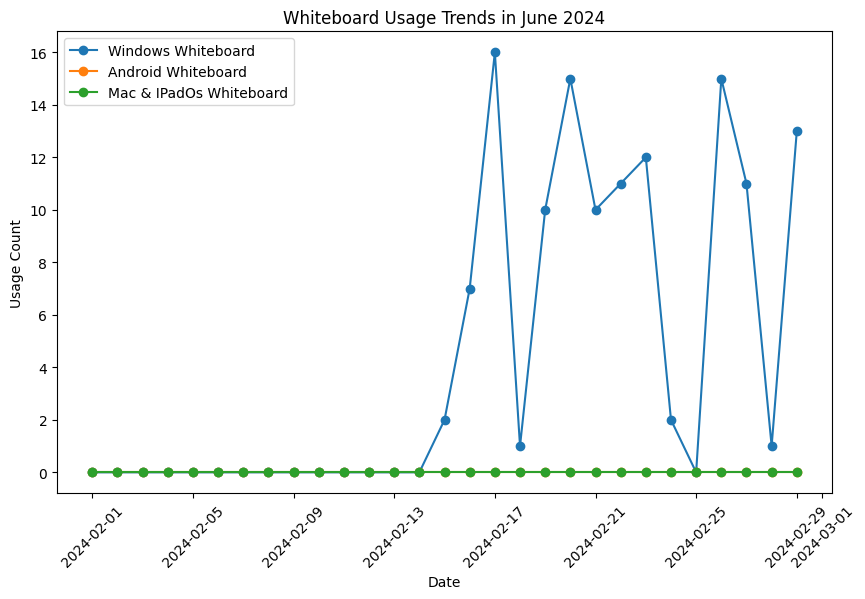

In [6]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot each whiteboard's data as a line
plt.plot(df2['Date'], df2['Windows Whiteboard'], marker='o', label='Windows Whiteboard')
plt.plot(df2['Date'], df2['Android Whiteboard'], marker='o', label='Android Whiteboard')
plt.plot(df2['Date'], df2['Mac & IPadOs Whiteboard'], marker='o', label='Mac & IPadOs Whiteboard')

# Add titles and labels
plt.title("Whiteboard Usage Trends in June 2024")
plt.xlabel("Date")
plt.ylabel("Usage Count")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()

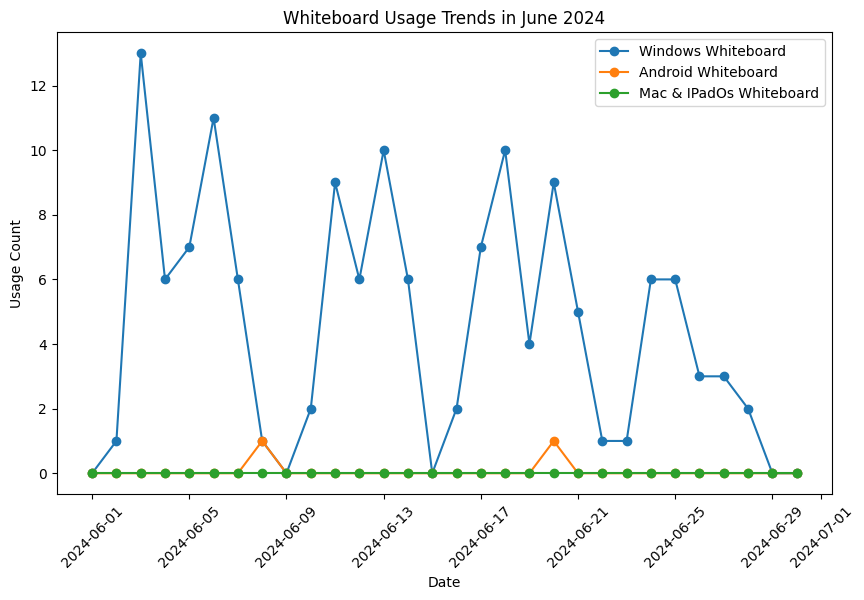

In [7]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot each whiteboard's data as a line
plt.plot(df6['Date'], df6['Windows Whiteboard'], marker='o', label='Windows Whiteboard')
plt.plot(df6['Date'], df6['Android Whiteboard'], marker='o', label='Android Whiteboard')
plt.plot(df6['Date'], df6['Mac & IPadOs Whiteboard'], marker='o', label='Mac & IPadOs Whiteboard')

# Add titles and labels
plt.title("Whiteboard Usage Trends in June 2024")
plt.xlabel("Date")
plt.ylabel("Usage Count")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()

我要將 df2 和 df6 合併在同一個新表格中

In [10]:
df_combined = pd.concat([df2, df6], ignore_index=True)

In [8]:
# Create a new column in the DataFrame that corresponds to the day of the week for each date
df2['Day of Week'] = df2['Date'].dt.day_name()
df6['Day of Week'] = df6['Date'].dt.day_name()

In [12]:
df_combined['Month'] = df_combined['Date'].dt.strftime('%B')
df_combined

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard,Day of Week,Month
0,2024-02-01,0,0,0,Thursday,February
1,2024-02-02,0,0,0,Friday,February
2,2024-02-03,0,0,0,Saturday,February
3,2024-02-04,0,0,0,Sunday,February
4,2024-02-05,0,0,0,Monday,February
5,2024-02-06,0,0,0,Tuesday,February
6,2024-02-07,0,0,0,Wednesday,February
7,2024-02-08,0,0,0,Thursday,February
8,2024-02-09,0,0,0,Friday,February
9,2024-02-10,0,0,0,Saturday,February


根據星期的使用數量畫出箱型圖

In [14]:
import plotly.express as px

# Melt the data to make it suitable for the violin plot

df_melted = df_combined.melt(id_vars=["Month", "Day of Week"], value_vars=["Windows Whiteboard"],
                    var_name="Platform", value_name="Usage")

df_melted

,Month,Day of Week,Platform,Usage
0,February,Thursday,Windows Whiteboard,0
1,February,Friday,Windows Whiteboard,0
2,February,Saturday,Windows Whiteboard,0
3,February,Sunday,Windows Whiteboard,0
4,February,Monday,Windows Whiteboard,0
5,February,Tuesday,Windows Whiteboard,0
6,February,Wednesday,Windows Whiteboard,0
7,February,Thursday,Windows Whiteboard,0
8,February,Friday,Windows Whiteboard,0
9,February,Saturday,Windows Whiteboard,0


In [15]:
# Create a violin plot using Plotly
fig = px.box(df_melted, x="Day of Week", y="Usage", color="Month", points="all")

# Update the layout for better readability
fig.update_layout(
    title="Whiteboard Usage Distribution by Day of the Week",
    xaxis_title="Day of the Week",
    yaxis_title="Usage Count"
)

# Show the plot
fig.show()

In [ ]:
max(df_melted['Usage'])

13

圖中的關鍵要素：

    盒子（Box）：
        盒子表示數據的四分位範圍（Interquartile Range, IQR），也就是從第 25 百分位（Q1）到第 75 百分位（Q3）之間的範圍。
        盒子的上緣表示第 75 百分位（即 75% 的數據點低於此值），而下緣則表示第 25 百分位（即 25% 的數據點低於此值）。
        這段範圍內的數據是圖表中的「中位數據」，即中間 50% 的數據。

    中位數（Median）：
        盒子中間的粗線表示數據的中位數（第 50 百分位），代表 50% 的數據低於此數值，50% 的數據高於此數值。
        中位數是數據集中最能代表典型數據的值。

    觸鬚（Whiskers）：
        觸鬚延伸至數據中非極端值的最大範圍，通常顯示從 Q1 到 Q3 之間的 1.5 倍 IQR。
        觸鬚代表數據中的範圍，除了極端值（Outliers）。

    異常值（Outliers）：
        如果有數據點遠離其他數據（位於 Q1 和 Q3 之外的 1.5 倍 IQR），這些數據點會顯示為圖上的「孤立點」。
        這些是異常數據或可能的異常值。

    數據點（Points）：
        顯示圖中的所有具體數據點，這樣可以看到原始數據的具體分佈。
        數據點讓我們能夠清楚了解每一天不同平台上的具體使用次數。

    不同平台的比較：
        每個平台（Windows Whiteboard, Android Whiteboard, Mac & iPadOS Whiteboard）會以不同顏色表示在不同天的使用情況。你可以通過顏色來區分這些平台，並看到它們的數據分佈範圍。

    數據範圍和分佈：
        例如，針對 Windows Whiteboard 的使用情況，某些天數的數據分佈範圍可能比較大（如星期一），這代表這一天的使用量有明顯的高低不一。
        如果某些天的盒子較窄，這代表這一天的數據集中分佈在一個較窄的範圍內，波動不大。

    異常值：
        如果有一些異常值，這些數據會顯示為「孤立點」，表示該天的某些使用量異常突出（可能高於或低於其他數據點）。

    平台之間的使用差異：
        你可以通過觀察圖中的不同平台，發現某些平台（如 Windows Whiteboard）的使用頻率和分佈範圍明顯比其他平台（如 Android Whiteboard）更大。

總結：

這個圖能幫助你比較不同白板平台（Windows、Android、Mac & iPadOS）在不同日期的使用情況。通過這個圖表，你可以了解哪天哪個平台的使用量波動較大，以及是否存在使用上的異常情況。你可以快速看到某些天的數據集中在哪個範圍，並發現不同平台的使用趨勢。

可以看到的內容：

    參與度和互動性：
        頻繁使用白板可能暗示學生積極參與教學活動。特別是在協作白板工具中，高使用量通常表示師生或學生之間的討論和互動較多，這是積極學習環境的標誌。
        白板的使用頻率可以反映學生在課堂中的動態，尤其是學生是否在課堂中進行了大量的視覺化學習、問題解答或頭腦風暴。

    特定日子的學習強度：
        通過不同日期白板使用量的變化，可以了解在某些特定日子（例如考試準備或課題討論期間），學生是否進行了更多學習活動。
        對應於教學計畫或課程進度的白板使用變化，可能暗示學習過程中的重要節點或挑戰時期。

    平台的使用偏好：
        根據不同平台（Windows、Android、Mac & iPadOS）的使用量，教師可以看到學生更傾向於使用哪一個平台學習，這可能提供有關學習工具適配性的資訊。例如，某平台的使用量偏低可能暗示技術上的挑戰或學習者的偏好。

無法看到的內容：

    學習成效的直接測量：
        白板使用頻率與學習成效不一定有直接的相關性。僅僅通過白板的使用量，無法確定學生是否真的掌握了所學內容。頻繁使用白板並不意味著學習成效高，反之亦然。學習成效還取決於學習內容的深度、理解程度以及學生是否能應用所學知識。

    學生的認知理解與思考深度：
        白板的使用情況無法揭示學生的思維過程和理解深度。雖然可以看到某些視覺化內容或解答過程，但難以了解學生在學習過程中的真正認知狀況或他們是如何處理所學知識的。

    學生間的協作品質：
        雖然白板工具可以用來進行協作，但僅通過白板的使用量無法了解協作的質量。即便白板使用頻繁，也可能只是一小部分學生主導了討論，其他學生可能僅僅被動參與。

    學習動機與學習態度：
        白板的使用情況不能反映學生的學習動機。學生可能因不同原因使用白板，比如外在壓力（如考試）、教師要求，這與學生的內在學習動機和學習態度無法直接對應。

    學習的個性化差異：
        每個學生的學習風格和學習方式不同。某些學生可能偏好視覺化學習，因此更多使用白板，而其他學生可能更偏好閱讀或筆記，並不經常使用白板。僅依賴白板的使用情況，無法全面評估每個學生的學習效果。

結論：

白板的使用情況可以為學生在課堂上的參與度、互動性、學習強度提供有用的資訊，但它不是直接衡量學習成效的工具。要準確評估學生的學習效果，還需要結合其他評估方法，例如測驗成績、課堂表現、作業質量以及對知識應用能力的考察。